参考资料：[有基础（Pytorch/TensorFlow基础）mxnet+gluon快速入门](https://www.jianshu.com/p/8b20a6e49bca)

# symbol

`symbol` 是一个重要的概念，可以理解为符号，就像我们平时使用的代数符号 `x`，`y`，`z` 一样。一个简单的类比，一个函数 $f(x) = x^{2}$，符号 `x` 就是 symbol，而具体 `x` 的值就是 ndarray，关于 symbol 的是 `mxnet.sym`，具体可参照[官方API文档](https://mxnet.incubator.apache.org/api/python/symbol/symbol.html)

## 基本操作

- 使用 `mxnet.sym.Variable()` 传入名称可建立一个 symbol
- 使用 `mxnet.viz.plot_network(symbol=)` 传入 symbol 可以绘制运算图

In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'  # 解决 path 错误

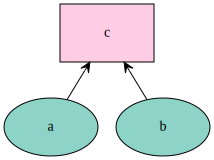

In [3]:
import mxnet as mx

a = mx.sym.Variable('a')
b = mx.sym.Variable('b')
c = mx.sym.add_n(a,b,name="c")
mx.viz.plot_network(symbol=c)

## 带入 ndarray
使用 `mxnet.sym.bind()` 方法可以获得一个带入操作数的对象，再使用 `forward()` 方法可运算出数值

In [4]:
x = c.bind(ctx=mx.cpu(),args={"a": mx.nd.ones(5),"b":mx.nd.ones(5)})
result = x.forward()
print(result)

[
[2. 2. 2. 2. 2.]
<NDArray 5 @cpu(0)>]


## mxnet 的数据载入

深度学习中数据的载入方式非常重要，mxnet 提供了 `mxnet.io` 的一系列 `dataiter` 用于处理数据载入，详细可参照[官方API文档](https://mxnet.incubator.apache.org/api/python/io/io.html)。同时，动态图接口`gluon` 也提供了 `mxnet.gluon.data` 系列的 `dataiter` 用于数据载入,详细可参照[官方API文档](https://mxnet.incubator.apache.org/api/python/gluon/data.html)

### `mxnet.io` 数据载入

`mxnet.io`的数据载入核心是 `mxnet.io.DataIter` 类及其派生类，例如 `ndarray` 的 iter：`NDArrayIter`
- 参数 `data`：传入一个(名称-数据)的数据 dict
- 参数 `label`：传入一个(名称-标签)的标签 dict
- 参数 `batch_size`：传入 batch 大小

In [5]:
dataset = mx.io.NDArrayIter(data={'data':mx.nd.ones((10,5))},label={'label':mx.nd.arange(10)},batch_size=5) 
for i in dataset: 
    print(i) 
    print(i.data,type(i.data[0])) 
    print(i.label,type(i.label[0])) 

DataBatch: data shapes: [(5, 5)] label shapes: [(5,)]
[
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<NDArray 5x5 @cpu(0)>] <class 'mxnet.ndarray.ndarray.NDArray'>
[
[0. 1. 2. 3. 4.]
<NDArray 5 @cpu(0)>] <class 'mxnet.ndarray.ndarray.NDArray'>
DataBatch: data shapes: [(5, 5)] label shapes: [(5,)]
[
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<NDArray 5x5 @cpu(0)>] <class 'mxnet.ndarray.ndarray.NDArray'>
[
[5. 6. 7. 8. 9.]
<NDArray 5 @cpu(0)>] <class 'mxnet.ndarray.ndarray.NDArray'>


### `gluon.data` 数据载入
gluon 的数据 API 几乎与 pytorch 相同，均是 `Dataset+DataLoader` 的方式：

- `Dataset`：存储数据，使用时需要继承该基类并重载 `__len__(self)` 和 `__getitem__(self,idx)` 方法
- `DataLoader`：将 `Dataset` 变成能产生 batch 的可迭代对象

In [8]:
dataset = mx.gluon.data.ArrayDataset(mx.nd.ones((10,5)),mx.nd.arange(10)) 
loader = mx.gluon.data.DataLoader(dataset,batch_size=5) 
for i,data in enumerate(loader): 
    print(i) 
    print(data) 

0
[
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<NDArray 5x5 @cpu(0)>, 
[0. 1. 2. 3. 4.]
<NDArray 5 @cpu(0)>]
1
[
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<NDArray 5x5 @cpu(0)>, 
[5. 6. 7. 8. 9.]
<NDArray 5 @cpu(0)>]


In [9]:
class TestSet(mx.gluon.data.Dataset):
    def __init__(self): 
        self.x = mx.nd.zeros((10,5)) 
        self.y = mx.nd.arange(10) 
        
    def __getitem__(self,i): 
        return self.x[i],self.y[i] 
    
    def __len__(self): 
        return 10 
    
    
for i,data in enumerate(mx.gluon.data.DataLoader(TestSet(),batch_size=5)): 
    print(data) 

[
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
<NDArray 5x5 @cpu(0)>, 
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]]
<NDArray 5x1 @cpu(0)>]
[
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
<NDArray 5x5 @cpu(0)>, 
[[5.]
 [6.]
 [7.]
 [8.]
 [9.]]
<NDArray 5x1 @cpu(0)>]


# 网络搭建

## `mxnet` 网络搭建

`mxnet` 网络搭建类似于 `TensorFlow`，使用 `symbol` 搭建出网络，再用一个 `module` 封装

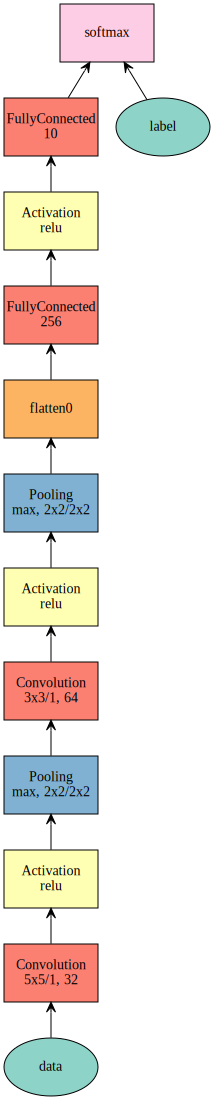

In [10]:
data = mx.sym.Variable('data') 
# layer1 
conv1 = mx.sym.Convolution(data=data, kernel=(5,5), num_filter=32,name="conv1")
relu1 = mx.sym.Activation(data=conv1,act_type="relu",name="relu1") 
pool1 = mx.sym.Pooling(data=relu1,pool_type="max",kernel=(2,2),stride=(2,2),name="pool1") 
# layer2 
conv2 = mx.sym.Convolution(data=pool1, kernel=(3,3), num_filter=64,name="conv2") 
relu2 = mx.sym.Activation(data=conv2,act_type="relu",name="relu2") 
pool2 = mx.sym.Pooling(data=relu2,pool_type="max",kernel=(2,2),stride=(2,2),name="pool2") 
# layer3 
fc1 = mx.symbol.FullyConnected(data=mx.sym.flatten(pool2), num_hidden=256,name="fc1") 
relu3 = mx.sym.Activation(data=fc1, act_type="relu",name="relu3") 
# layer4 
fc2 = mx.symbol.FullyConnected(data=relu3, num_hidden=10,name="fc2")
out = mx.sym.SoftmaxOutput(data=fc2, label=mx.sym.Variable("label"),name='softmax') 
mxnet_model = mx.mod.Module(symbol=out,label_names=["label"],context=mx.gpu()) 
mx.viz.plot_network(symbol=out) 